In [50]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import GraphHelpers as GH
# 

In [24]:
ExptCvNames = ['EGA_Gregory', 'EGA_Wedgetail', 'Illabo', 'Janz', 'LRPB_Kittyhawk',
       'LRPB_Mowhawk', 'Mace', 'Meering', 'Osprey', 'Rosella', 'Scepter',
       'Sunmaster', 'Whistler', 'Wyalkatchem', 'Wylah', 'Yitpi']
APSIMCvNames = ['Gregory', 'Wedgetail', 'Illabo', 'Janz', 'Kittyhawk',
       'Mowhawk', 'Mace', 'Meering', 'Osprey', 'Rosella', 'Scepter',
       'Sunmaster', 'Whistler', 'Wyalkatchem', 'Wylah', 'Yitpi']
CVNames = dict(zip(ExptCvNames,APSIMCvNames))

In [7]:
# import io
# import sharepy
# import pandas as pd

# URL = 'https://unimelbcloud.sharepoint.com/teams/GRDCWheatYieldPhysiology'
# SHAREPOINT_USER = 'Hamish.Brown@plantandfood.co.nz'
# SHAREPOINT_PASSWORD = 'ZORr%zJ4WAT2&KHc'
# FILE_URL = '/Shared%20Documents/General/Experiments/UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx'

# s = sharepy.connect(URL, username=SHAREPOINT_USER, password=SHAREPOINT_PASSWORD)
# r = s.get(URL+FILE_URL)
# f = io.BytesIO(r.content)
# df = pd.read_csv(f)

In [8]:
from office365.runtime.auth.authentication_context import AuthenticationContext
# from office365.sharepoint.client_context import ClientContext
# from office365.sharepoint.files.file import File 

# ####inputs########
# # This will be the URL that points to your sharepoint site. 
# # Make sure you change only the parts of the link that start with "Your"
# url_shrpt = 'https://unimelbcloud.sharepoint.com/teams/GRDCWheatYieldPhysiology'
# username_shrpt = 'Hamish.Brown@plantandfood.co.nz'
# password_shrpt = 'ZORr%zJ4WAT2&KHc'
# folder_url_shrpt = '/Shared%20Documents/General/Experiments/'
# fileName = 'UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx'
# #######################

# ctx_auth = AuthenticationContext(url_shrpt)
# ctx_auth.acquire_token_for_user(username_shrpt, password_shrpt)   
# ctx = ClientContext(url_shrpt, ctx_auth)
# response = File.open_binary(ctx, folder_url_shrpt+fileName)
# with open("./User Guide.docx", "wb") as local_file:
#     local_file.write(response.content)

In [64]:
HaunStageData = pd.read_excel('UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx',
              sheet_name='Haun stage', usecols="D,L,P")
HaunStageData.columns = ['Cultivar','Clock.Today','Wheat.Phenology.HaunStage']
HaunStageData.loc[:,'Cultivar'] = [CVNames[x] for x in HaunStageData.loc[:,'Cultivar']]
HaunStageData.loc[:,'SimulationName'] = ['Dookie2024Cv'+HaunStageData.loc[x,'Cultivar'] for x in HaunStageData.index]
HaunStageData.set_index(['SimulationName','Clock.Today'],inplace=True)
HaunStageData.drop('Cultivar',axis=1,inplace=True)
HaunStageData.sort_index(inplace=True)
HaunStageData.dropna(inplace=True)
HaunStageMeans = HaunStageData.groupby(['SimulationName','Clock.Today']).mean()

In [31]:
SimulationNames = HaunStageData.index.get_level_values(0).drop_duplicates()

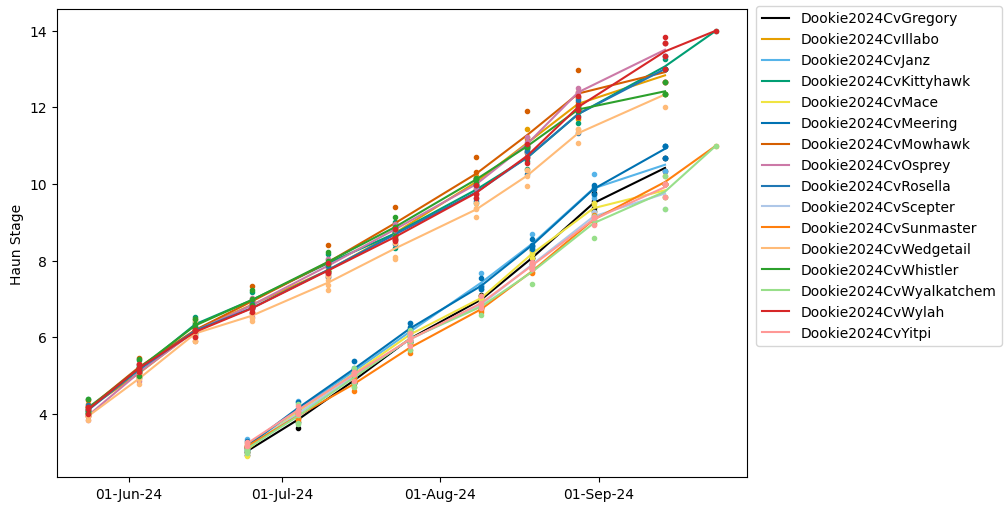

In [66]:
fig = plt.figure(layout='constrained',figsize=(10,5))
ax = fig.add_subplot(1,1,1)
pos=1
for s in SimulationNames:
    plt.plot(HaunStageMeans.loc[s,:],
             '-',color=GH.Colors[pos],label=s)
    plt.plot(HaunStageData.loc[s,:],'o',ms=3,color=GH.Colors[pos])
    pos+=1
plt.ylabel('Haun Stage')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
fig.legend(loc='outside right upper')


In [75]:
NDVIData = pd.read_excel('UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx',
              sheet_name='NDVI & height', usecols="D,L,M,N")
NDVIData.columns = ['Cultivar','Clock.Today','Wheat.Height','NDVIModel.Script.NDVI']
NDVIData.loc[:,'Cultivar'] = [CVNames[x] for x in NDVIData.loc[:,'Cultivar']]
NDVIData.loc[:,'SimulationName'] = ['Dookie2024Cv'+NDVIData.loc[x,'Cultivar'] for x in NDVIData.index]
NDVIData.set_index(['SimulationName','Clock.Today'],inplace=True)
NDVIData.drop('Cultivar',axis=1,inplace=True)
NDVIData.sort_index(inplace=True)
NDVIData.dropna(inplace=True,how='all')
NDVIMeans = NDVIData.groupby(['SimulationName','Clock.Today']).mean()

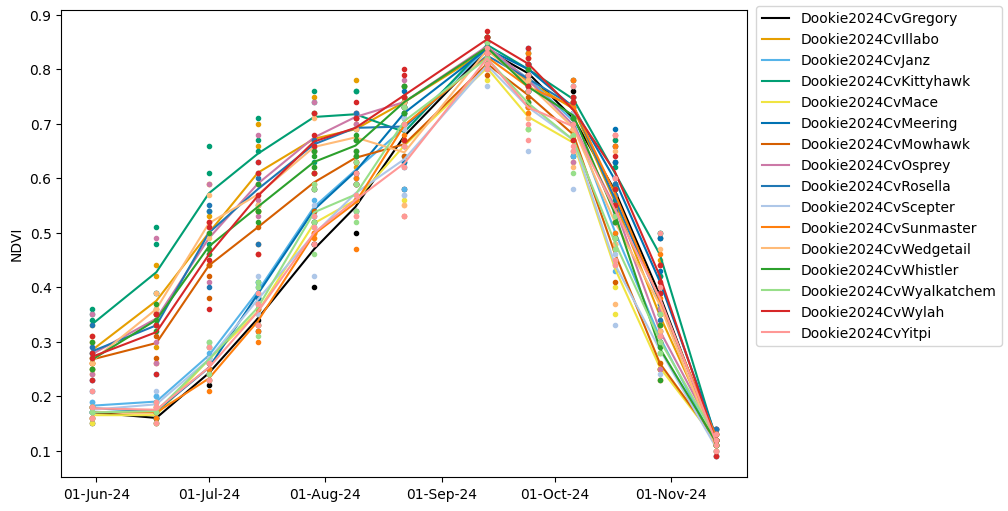

In [83]:
fig = plt.figure(layout='constrained',figsize=(10,5))
ax = fig.add_subplot(1,1,1)
pos=1
for s in SimulationNames:
    plt.plot(NDVIMeans.loc[s,'NDVIModel.Script.NDVI'],
             '-',color=GH.Colors[pos],label=s)
    plt.plot(NDVIData.loc[s,'NDVIModel.Script.NDVI'],'o',ms=3,color=GH.Colors[pos])
    pos+=1
plt.ylabel('NDVI')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
fig.legend(loc='outside right upper')


In [86]:
Observed = pd.concat([NDVIMeans,HaunStageMeans])
Observed.to_excel('../data/Dookie2024.xlsx',sheet_name='Observed',merge_cells=False)